In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('enhanced_synthetic_dataset.csv')

# Convert types to 'malicious' and 'benign'
data['label'] = data['type'].apply(lambda x: 'benign' if x == 'benign' else 'malicious')

In [ ]:
# Feature Extraction
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['url'])
y = data['label']

In [ ]:
X_sample, _, y_sample, _ = train_test_split(X, y, random_state=42, stratify=y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

# Train the SVM model
model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred, target_names=['benign', 'malicious'])
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=['benign', 'malicious'])

In [ ]:
# Save results to a CSV file
results = pd.DataFrame({
    'url': data['url'].iloc[y_test.index].values,
    'actual_label': y_test,
    'predicted_label': y_test_pred
})

results.to_csv('url_classification_results.csv', index=False)

In [ ]:
# Evaluation metrics
print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Training Accuracy: 72.22%
Test Accuracy: 68.11%

Classification Report:
               precision    recall  f1-score   support

      benign       0.68      0.98      0.80       594
   malicious       0.74      0.09      0.17       306

    accuracy                           0.68       900
   macro avg       0.71      0.54      0.49       900
weighted avg       0.70      0.68      0.59       900


Confusion Matrix:
 [[584  10]
 [277  29]]


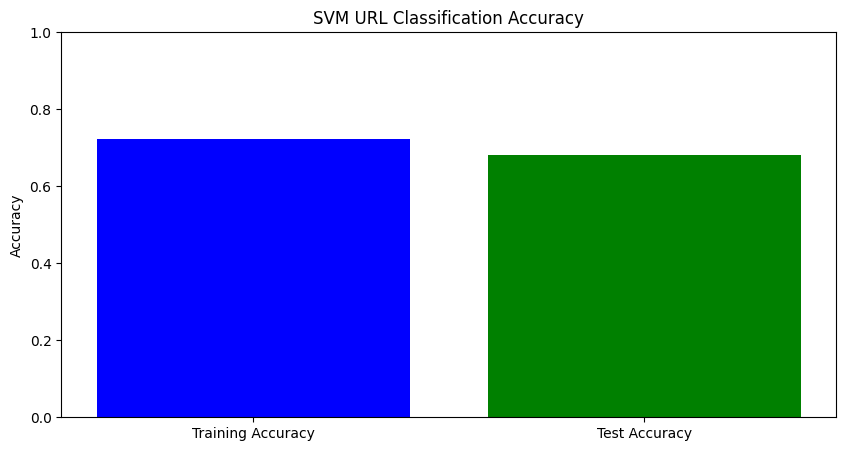

In [ ]:
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('SVM URL Classification Accuracy')
plt.ylim(0, 1)
plt.show()

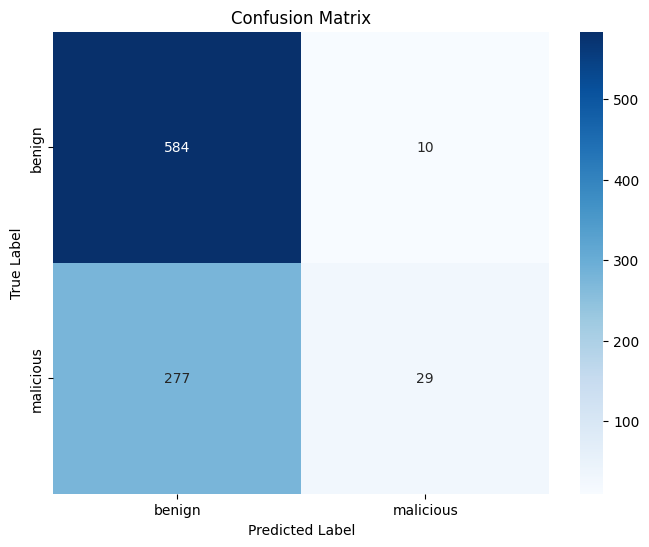

In [ ]:
# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malicious'], yticklabels=['benign', 'malicious'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

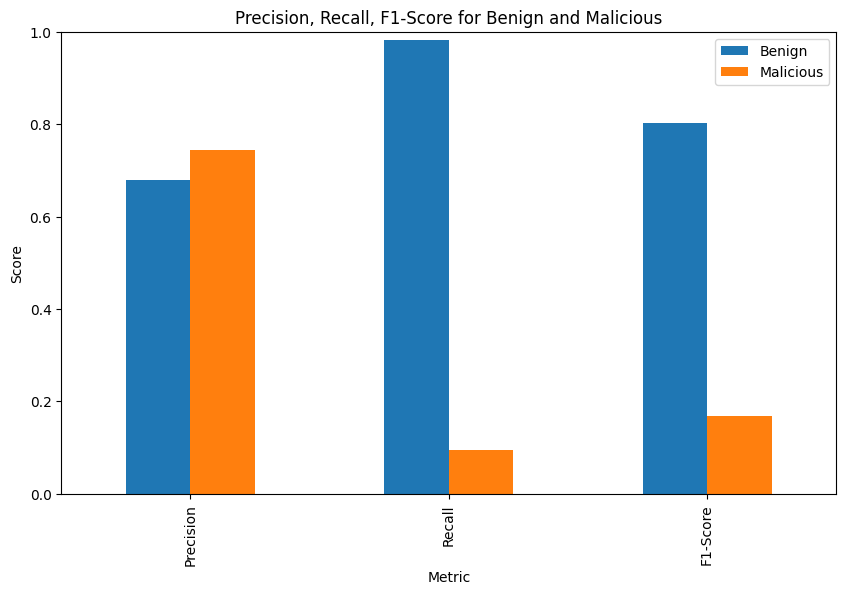

In [ ]:
# Precision-Recall-F1 Plot
precision_recall = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Benign': [
        classification_report(y_test, y_test_pred, output_dict=True)['benign']['precision'],
        classification_report(y_test, y_test_pred, output_dict=True)['benign']['recall'],
        classification_report(y_test, y_test_pred, output_dict=True)['benign']['f1-score']
    ],
    'Malicious': [
        classification_report(y_test, y_test_pred, output_dict=True)['malicious']['precision'],
        classification_report(y_test, y_test_pred, output_dict=True)['malicious']['recall'],
        classification_report(y_test, y_test_pred, output_dict=True)['malicious']['f1-score']
    ]
})
precision_recall.set_index('Metric', inplace=True)
precision_recall.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, F1-Score for Benign and Malicious')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

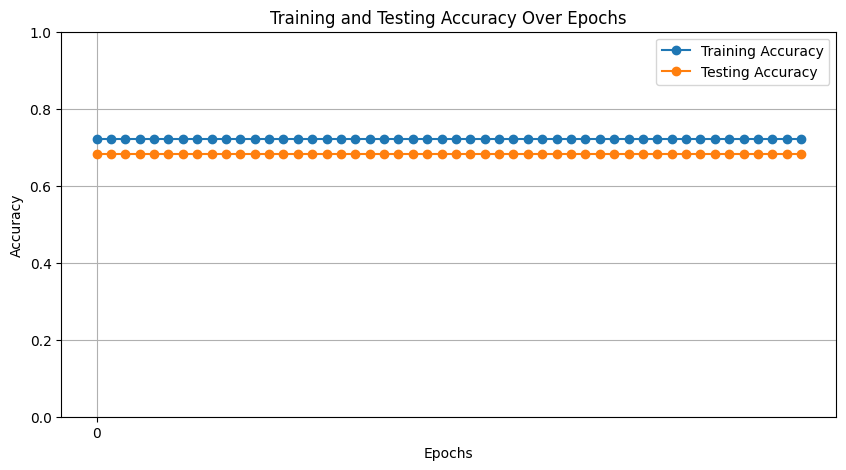

In [ ]:
# Lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Training loop for multiple epochs
num_epochs = 50
for epoch in range(num_epochs):
    model.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(num_epochs), test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.ylim(0, 1)
plt.xticks(np.arange(0, num_epochs, step=50))
plt.grid()
plt.legend()
plt.show()